In [1]:
# Чем чаще преподаватель совершает действия на курсе, тем выше средняя промежуточная оценка студентов.
# Таблица логов за 2022-2023 год для ДО с ролью 3 4 5: DO(2022-2023)(3,4,5)
# журнал оценок по ипр, кр, тестам для ДО: Grade.csv
# выгрузка айдишников преподавателей, в том числе преподавателей-магистрантов: lmsdb_mdl_user

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import pytz
import matplotlib as mpl
import calendar
import statistics

In [3]:
# Открываем Grade.csv и преобразвываем дату
d_parser = lambda x: pd.to_datetime(x, unit='s')
Grade = pd.read_csv('C://Users//37529//Desktop//data since//2th sem//Grade.csv', quotechar="'", delim_whitespace=True,
                    parse_dates=['timemodified'], date_parser=d_parser, index_col=0)
Grade['timemodified'] = Grade['timemodified'] + pd.Timedelta(hours=3)
# выбираем определенный период времени для исследования (с 01.09.2022-1.03.2023)
Grade_2022_2023=Grade.loc[(Grade['timemodified']>='2022-09-01')&(Grade['timemodified']<'2023-01-31')]
# Сортировка по времени
Grade_2022_2023 = Grade_2022_2023.sort_values(by='timemodified')
# Делаем выборку по оценкам от (0 до 10). Оценки, которым принадлежат от (10-100) не будут участвовать в анализе.
all_marks=list(Grade.finalgrade.unique())
selected_all_marks=[]
for i in all_marks:
    if i<=10.0 and i>=1:
        selected_all_marks.append(i)
Grade_2022_2023 = Grade_2022_2023[Grade_2022_2023["finalgrade"].isin(selected_all_marks)]
# удаляем ненужные колонки
Grade_2022_2023=Grade_2022_2023.drop(columns = ['name', 'shortname','itemname'], axis = 1) 
Grade_2022_2023.reset_index(drop= True , inplace= True )
# меняем название колонки для дальнейшего объединения двух таблиц
Grade_2022_2023.rename(columns={'finalgrade':'action','timemodified':'timecreated'}, inplace=True)
# создаем список всех курсов, в которых были поставлены оценки 
grade_courseid=list(Grade_2022_2023.courseid.unique())
Grade_2022_2023

,courseid,action,timecreated
0,2259,5.00000,2022-09-01 11:17:04
1,71,7.50000,2022-09-02 09:24:56
2,153,10.00000,2022-09-04 11:00:38
3,153,10.00000,2022-09-04 11:06:36
4,153,8.57143,2022-09-04 11:12:53
...,...,...,...
1514,4099,4.00000,2023-01-30 22:19:50
1515,4098,1.20000,2023-01-30 23:50:32
1516,4098,2.00000,2023-01-30 23:50:32
1517,4098,1.00000,2023-01-30 23:56:13


,courseid,action,timecreated
0,2259,5.00000,2022-09-01 11:17:04
1,71,7.50000,2022-09-02 09:24:56
2,153,10.00000,2022-09-04 11:00:38
3,153,10.00000,2022-09-04 11:06:36
4,153,8.57143,2022-09-04 11:12:53
...,...,...,...
1514,4099,4.00000,2023-01-30 22:19:50
1515,4098,1.20000,2023-01-30 23:50:32
1516,4098,2.00000,2023-01-30 23:50:32
1517,4098,1.00000,2023-01-30 23:56:13


In [4]:
# Загрузка  "журнала событий" с записями действий только преподователей и студенто дистанционной формы обучения
d_parser = lambda x: pd.to_datetime(x, unit='s')
logstore = pd.read_csv('C://Users//37529//Desktop//data since//2th sem//DO(2022-2023)(3,4,5).csv', quotechar="'", 
                       delim_whitespace=True, parse_dates=['timecreated'], date_parser=d_parser, index_col=0)
# Преобразование времени
logstore['timecreated'] = logstore['timecreated'] + pd.Timedelta(hours=3)
logstore

,eventname,component,action,target,objecttable,objectid,crud,edulevel,contextid,contextlevel,contextinstanceid,userid,courseid,relateduserid,anonymous,other,timecreated,origin,ip,realuserid
id,,,,,,,,,,,,,,,,,,,,
96551774,\core\event\course_viewed,core,viewed,course,-,-,r,2,244,50,13,11557,13,-,0,N;,2022-09-02 12:28:45,web,172.25.180.43,-
96570642,\report_log\event\report_viewed,report_log,viewed,report,-,-,r,0,244,50,13,11557,13,0,0,"a:5:{s:7:""groupid"";i:0;s:4:""date"";i:0;s:5:""mod...",2022-09-02 15:38:26,web,172.25.180.43,-
96572430,\report_log\event\report_viewed,report_log,viewed,report,-,-,r,0,244,50,13,11557,13,0,0,"a:5:{s:7:""groupid"";i:0;s:4:""date"";i:0;s:5:""mod...",2022-09-02 16:00:28,web,172.25.180.43,-
96950436,\core\event\course_viewed,core,viewed,course,-,-,r,2,244,50,13,8514,13,-,0,N;,2022-09-08 16:42:04,web,172.16.246.251,-
96950437,\core\event\question_category_viewed,core,viewed,question_category,question_categories,106,r,1,244,50,13,8514,13,-,0,N;,2022-09-08 16:42:08,web,172.16.246.251,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98189467,\core\event\user_list_viewed,core,viewed,user_list,course,3238,r,0,197431,50,3238,11557,3238,-,0,"a:2:{s:15:""courseshortname"";s:16:""---ПИС (ДН)""...",2022-09-21 11:46:56,web,172.25.180.43,-
98189484,\report_log\event\report_viewed,report_log,viewed,report,-,-,r,0,197431,50,3238,11557,3238,0,0,"a:5:{s:7:""groupid"";i:0;s:4:""date"";i:0;s:5:""mod...",2022-09-21 11:47:06,web,172.25.180.43,-
98693458,\core\event\course_viewed,core,viewed,course,-,-,r,2,197431,50,3238,11557,3238,-,0,N;,2022-09-28 09:12:13,web,172.25.180.43,-


In [5]:
# выгрузка из базы именно преподавателей(с учетом магистрантов-преподов)
teachers = pd.read_csv('C://Users//37529//Desktop//data since//2th sem//lmsdb_mdl_user.csv')
# создаем список id-шников преподователей
teachers_userid=list(teachers['id'])
#сортируем журнал событий "logstore" и оставляем только действия преподавателей
logstore_teachers=logstore.query("userid in @teachers_userid")
logstore_teachers = logstore_teachers.sort_values(by='timecreated')
# сортируем по нужным нам курсам для анализа (в которых есть оценки)
logstore_teachers=logstore_teachers.query("courseid in @grade_courseid")
# оставляем нужные нам столбцы
final_logstore_teachers=logstore_teachers[["courseid","action","timecreated"]]
final_logstore_teachers=final_logstore_teachers.loc[(final_logstore_teachers['timecreated']>='2022-09-01')&
                                                    (final_logstore_teachers['timecreated']<'2023-01-31')]
final_logstore_teachers.reset_index(drop= True , inplace= True )
# для дальнейшего анализа меняем значение в колонке 'action' на 'actions of teachers', которое поможет нам в дальнейшем анализе
final_logstore_teachers['action'] = final_logstore_teachers['action'].replace(list(final_logstore_teachers.action.unique()),
                                                                              'actions of teachers')
final_logstore_teachers

,courseid,action,timecreated
0,5,actions of teachers,2022-09-01 08:53:26
1,5,actions of teachers,2022-09-01 08:53:26
2,5,actions of teachers,2022-09-01 08:53:45
3,5,actions of teachers,2022-09-01 08:53:45
4,5,actions of teachers,2022-09-01 08:53:55
...,...,...,...
150181,71,actions of teachers,2023-01-30 23:31:37
150182,71,actions of teachers,2023-01-30 23:31:37
150183,71,actions of teachers,2023-01-30 23:31:39
150184,71,actions of teachers,2023-01-30 23:31:39


In [6]:
# Соединяем таблицу с оценками (Grade_2022_2023) с таблицой действий преподавателей (final_logstore_teachers)
final_df = pd.concat([Grade_2022_2023.assign(), final_logstore_teachers.assign()])
# # Сортировка объединенной таблицы по времени
sorted_df = final_df.sort_values(by='courseid')
# удаление колонки со временем
sorted_df_1=sorted_df[["courseid","action"]]
sorted_df_1

,courseid,action
98745,5,actions of teachers
76613,5,actions of teachers
76614,5,actions of teachers
76615,5,actions of teachers
76616,5,actions of teachers
...,...,...
100305,5594,actions of teachers
100306,5594,actions of teachers
100307,5594,actions of teachers
99898,5594,actions of teachers


In [7]:
sorted_df_2=sorted_df[["courseid","action"]]
sorted_df_2=sorted_df_2.groupby (sorted_df_2.columns.tolist (), as_index= False ). size ()


,courseid,action,size
0,5,4.0,8
1,5,5.0,2
2,5,6.0,7
3,5,7.0,11
4,5,8.0,7
5,5,9.0,25
6,5,10.0,4
7,5,actions of teachers,2911
8,10,4.0,4
9,10,5.0,2


In [8]:
#  Нахождение средней ценки за курс и количества действий, совершенных преподавателем. 
#  Запись данных о кажом курсе в "df_for_correl"
all_courseid=list(sorted_df.courseid.unique())
df_for_correl=pd.DataFrame({'mark': [], 'actions of teachers': []})
for k in all_courseid:
    dist_с = [k]
    df_one_course = sorted_df_1[sorted_df_1["courseid"].isin(dist_с)]
    all_marks=[]
    actions=0
    for i, row in df_one_course.iterrows():
        if  row['action']=='actions of teachers':
            actions+=1
        else:
            all_marks.append(row['action'])
    everenge_mark=sum(all_marks)/len(all_marks)
    df_for_correl.loc[len(df_for_correl.index)]=[everenge_mark, actions]
df_for_correl

,mark,actions of teachers
0,7.531250,2911.0
1,7.526366,105.0
2,7.213305,4038.0
3,4.719523,701.0
4,6.830070,77.0
...,...,...
125,9.204546,528.0
126,4.000000,297.0
127,5.687372,73.0
128,7.000000,130.0


In [9]:
# удаление анамалий
df_for_correl = df_for_correl.sort_values(by='actions of teachers')
df_for_correl = df_for_correl.loc[~df_for_correl['actions of teachers'].isin([0,18529,12320])]
df_for_correl = df_for_correl.sort_values(by='actions of teachers')


,mark,actions of teachers
52,10.000000,3.0
59,9.000000,4.0
96,9.750000,4.0
116,2.911111,4.0
102,5.000000,8.0
...,...,...
7,7.699874,5959.0
106,3.351005,6921.0
121,7.521958,7334.0
113,8.173984,7631.0


In [10]:
# подсчет коэффициента корреляии данных таблицы "df_for_correl"
correlation= df_for_correl['mark'].corr(df_for_correl['actions of teachers'])
correlation

-0.06340582058994583

<AxesSubplot:xlabel='mark', ylabel='actions of teachers'>

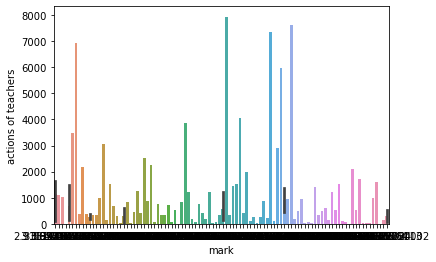

In [35]:
sns.barplot(data=df_for_correl, x ="mark", y ="actions of teachers")

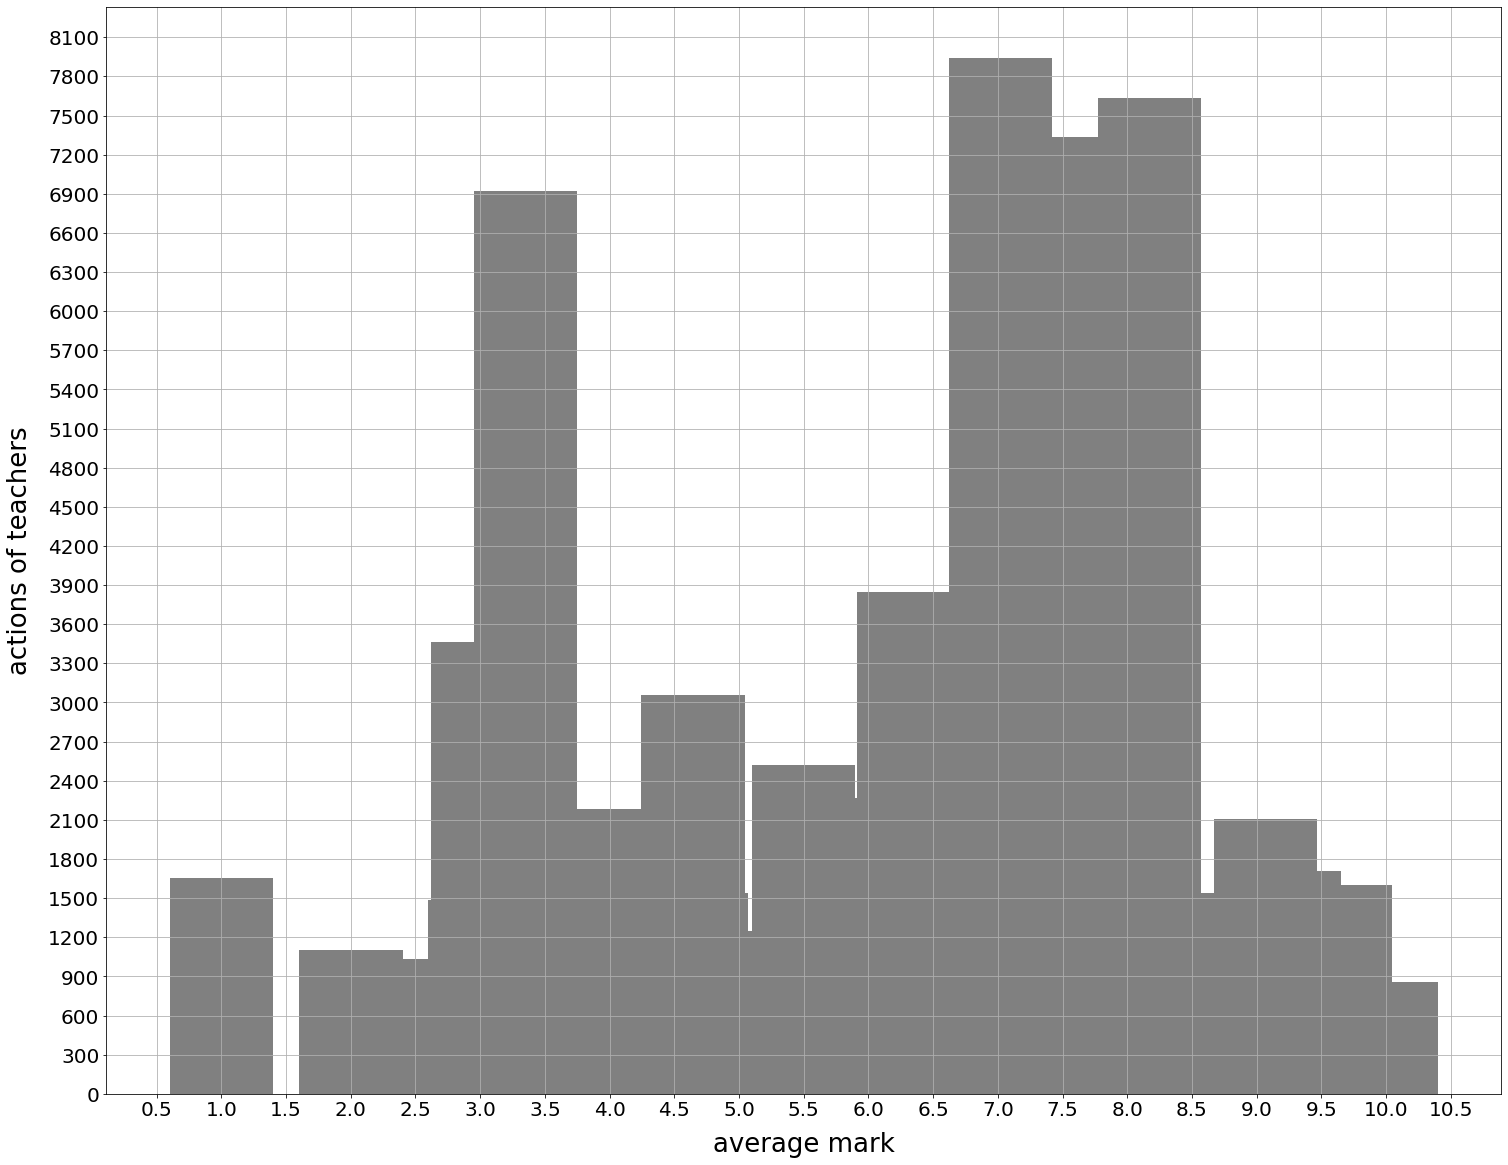

In [24]:
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
# визуализация диаграммы
plt.figure(figsize=(25, 20))
plt.title('', 
          size=32, pad = 18)
plt.xlabel('average mark',size=26, labelpad=12)
plt.ylabel('actions of teachers',size=26, labelpad=15) 
plt.xticks(df_for_correl['mark'])
plt.bar(df_for_correl['mark'], df_for_correl['actions of teachers'],  color="grey")

plt.gcf().axes[0].yaxis.set_major_locator(ticker.MultipleLocator(300))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].xaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.savefig('hourss.pdf')
plt.grid()
plt.show()

In [18]:
max(df_for_correl['actions of teachers'])

7938.0

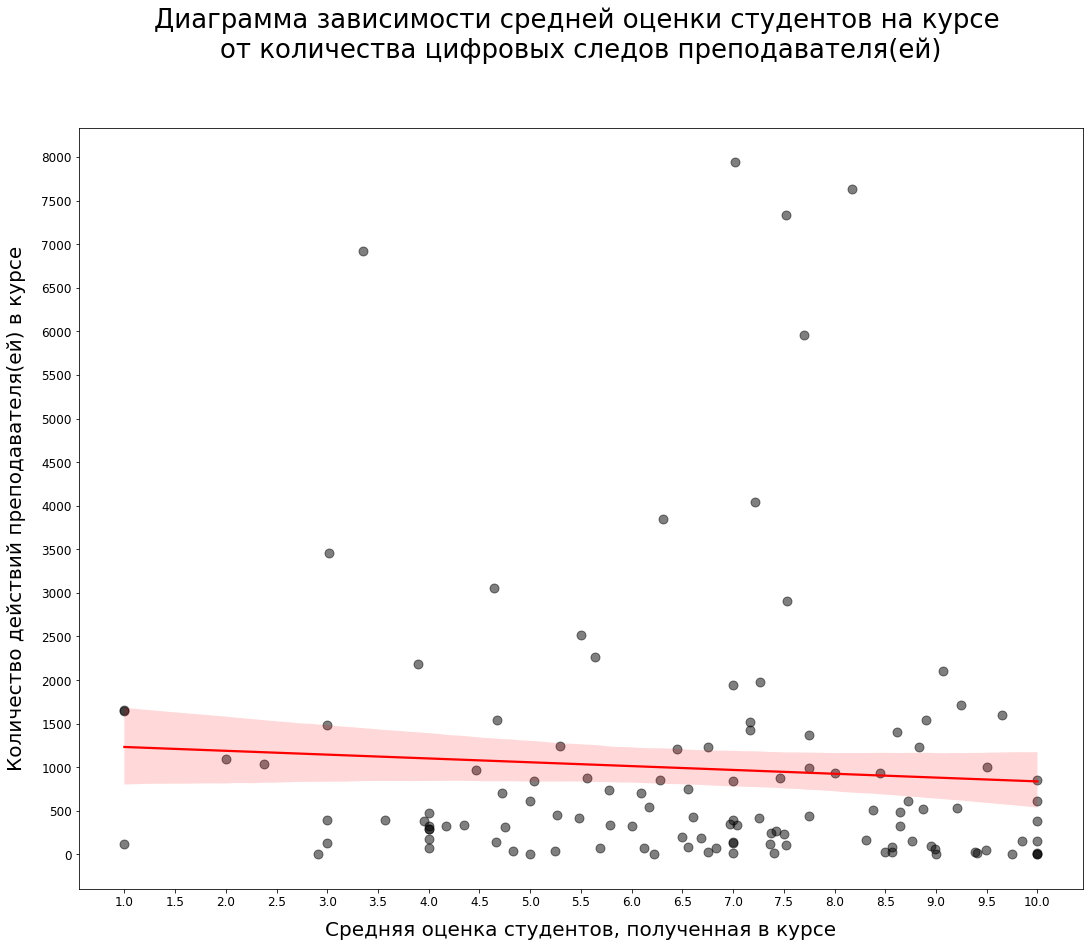

In [30]:
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
plt.figure(figsize=(18, 14))
sns.regplot(x = df_for_correl['mark'], y =df_for_correl['actions of teachers'], 
            scatter_kws = {"color": "black", "alpha": 0.5, "s": 80},
            line_kws = {"color": "red"},
            ci = 85)
plt.gcf().axes[0].yaxis.set_major_locator(ticker.MultipleLocator(500))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].xaxis.set_major_locator(ticker.MultipleLocator(.5))
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Диаграмма зависимости средней оценки студентов на курсе \nот количества цифровых следов преподавателя(ей)', 
          size=26, pad = 70)
plt.xlabel('Средняя оценка студентов, полученная в курсе',size=20, labelpad=12)
plt.ylabel('Количество действий преподавателя(ей) в курсе',size=20, labelpad=15) 
plt.savefig('Диаграмма рассеяния.pdf')